# Decision and Regression Trees

This notebook implements Decision and Regression Trees. Decision Trees are a non-parametric supervised learning method used for classification and regression. Regression Trees are a subset of Decision Trees used specifically for regression. One advantage of Decision and Regression Trees is that they tend to be relatively easy to understand and are also very effective. They have a tree like structure with nodes and branches (like trees connecting nodes). There are a few different types of nodes such as:

* a root node (at the top of the tree) that acts as the input node for feature vectors in the model
* decision nodes which are where the variables are evaluated
* leaf nodes which are the final nodes at which the prediction is made

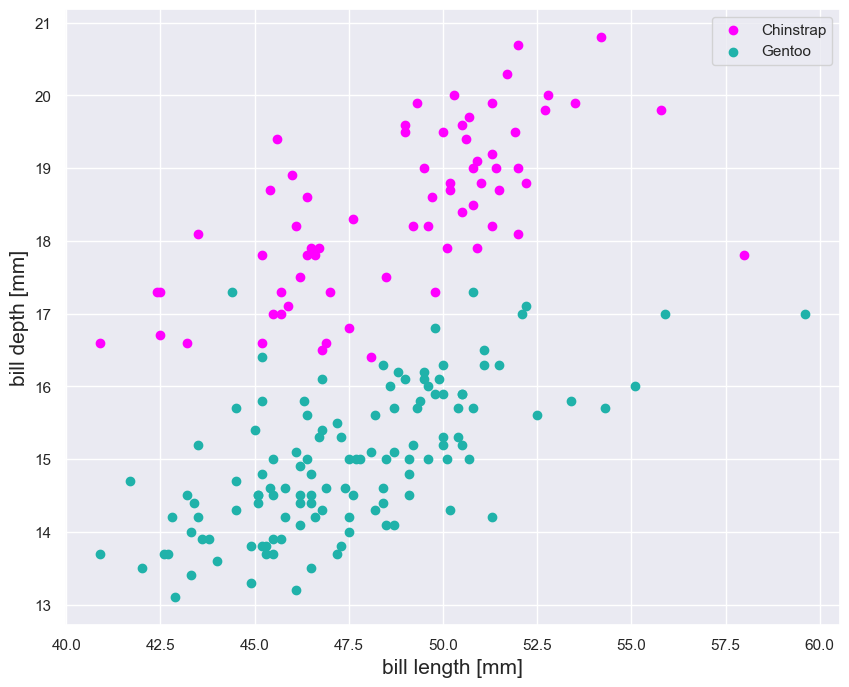

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
penguins = pd.read_csv("Datasets/palmer_penguins.csv")
penguins = penguins.iloc[151:]

X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1

# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

# Plot the data
penguin = ["Chinstrap", "Gentoo"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguin, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm, temp_df.bill_depth_mm, c = color, label = species)
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

As with all machine learning tasks, the data must be split into a training and testing subsets. This can be done by calling the ```sklearn.model_selection.train_test_split()``` function.

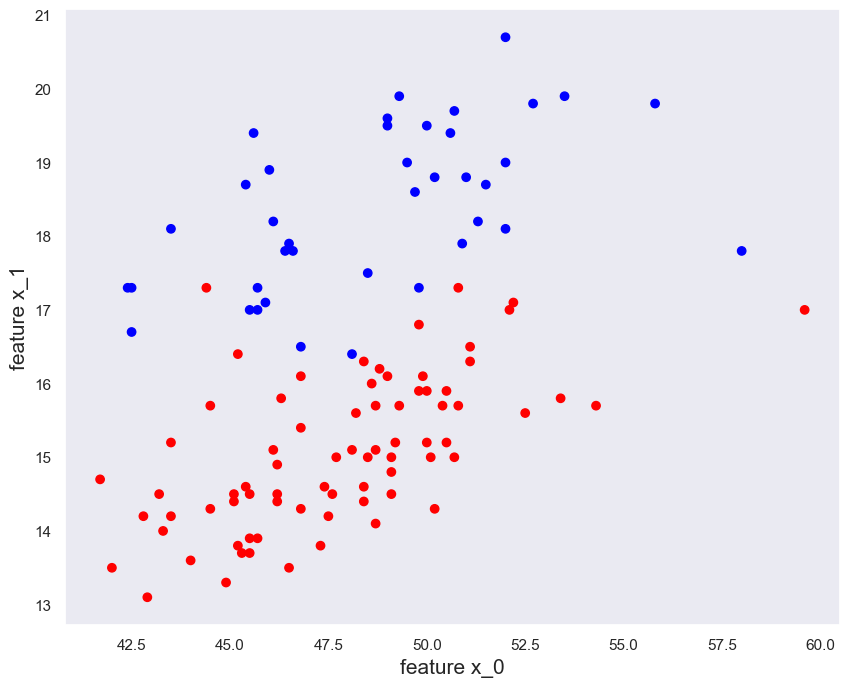

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

c_train = ["red" if label == 1 else "blue" for label in y_train]
c_test = ["red" if label == 1 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

An instance of the ```sklearn.tree.DecisionTreeClassifier``` model is instantiated so that the model can be trained by calling the ```fit()``` method.

In [3]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

Once the model has been trained, the tree structure of our current model can be visualized by calling the ```sklearn.tree.plot_tree()``` function. 

|--- x_1 <= 16.35
|   |--- class: 1
|--- x_1 >  16.35
|   |--- x_1 <= 17.40
|   |   |--- x_0 <= 50.30
|   |   |   |--- x_0 <= 45.35
|   |   |   |   |--- x_0 <= 43.45
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  43.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- x_0 >  45.35
|   |   |   |   |--- x_0 <= 48.95
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  48.95
|   |   |   |   |   |--- x_1 <= 17.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x_1 >  17.05
|   |   |   |   |   |   |--- class: 0
|   |   |--- x_0 >  50.30
|   |   |   |--- class: 1
|   |--- x_1 >  17.40
|   |   |--- class: 0
 



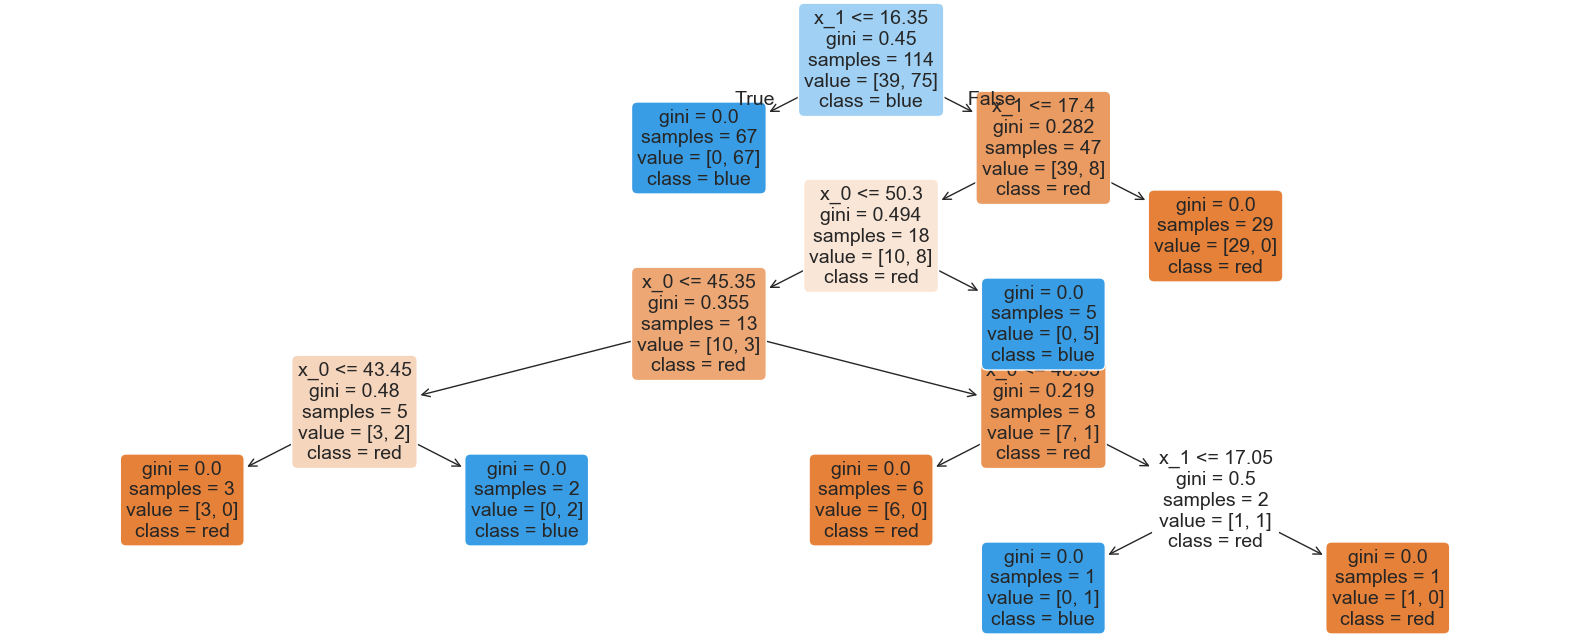

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree, feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree, feature_names = ["x_0", "x_1"], class_names = ["red", "blue"], rounded = True, filled = True, fontsize=14)
plt.show()

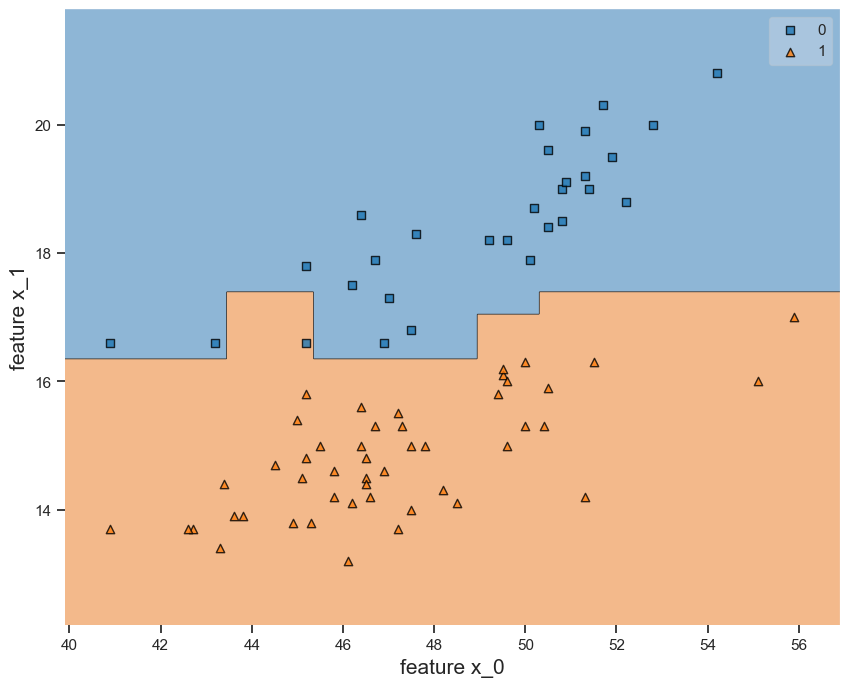

In [5]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

The models performance can now be evaluated on the testing data.

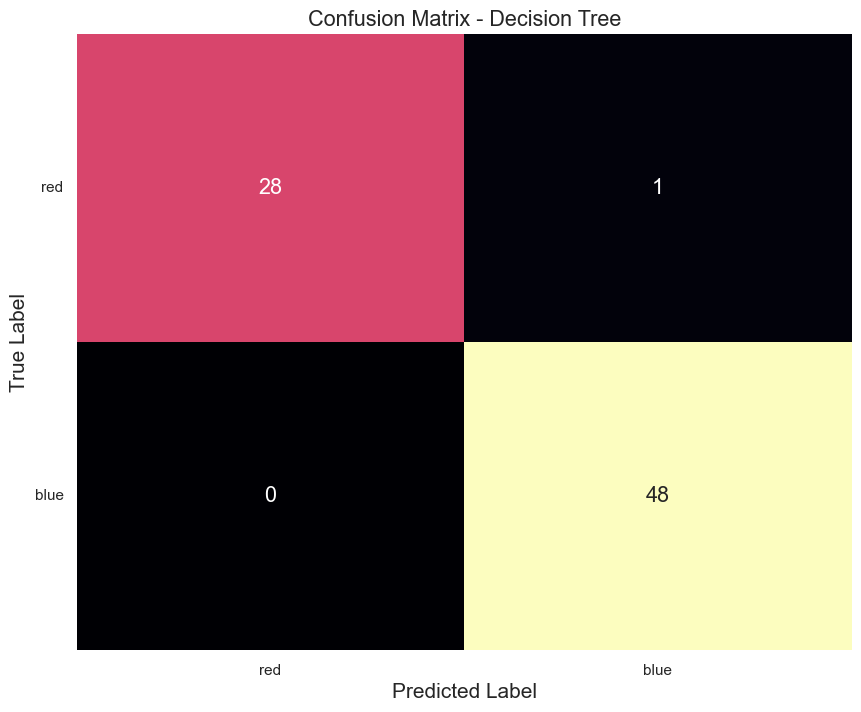

In [ ]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot = True, fmt = "g", ax = ax, cmap = "magma", cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [7]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.98      1.00      0.99        48

    accuracy                           0.99        77
   macro avg       0.99      0.98      0.99        77
weighted avg       0.99      0.99      0.99        77



Next regression will be performed on one of the columns of data using a regression tree. 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Datasets/palmer_penguins.csv")

X = df.iloc[151:].bill_depth_mm.values
X = X.reshape(-1, 1)
y = np.where(df.iloc[151:].species == "Chinstrap", 0, 1)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [10]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 0.025935979589414977 

MSE reg2: 0.05512152777777778 



In [11]:
reg1 = DecisionTreeRegressor(max_depth=1)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 0.025935979589414977 

MSE reg2: 0.05512152777777778 



Overall, the Decision Tree performed very well with only one misclassification and 99% accuracy. The Regression Tree also seemed to perform well as the MSE is very close to zero.